# Simple rate of return

$$
\text{simple rate of return} = \frac{\text{price at end} - \text{price at beginning}}{\text{price at beginning}}
$$

$$\text{simple rate of return} = \frac{\text{price at end}}{\text{price at beginning}} -1
$$

# Log rate of return

$$\text{log rate of return} = \ln\frac{\text{price at end}}{\text{price at beginning}} $$

$$\text{log rate of return}=\ln(\text{price at end}) - \ln(\text{price at beginning})$$

Why economists prefer the log rate of return:
<ol>
    <li>log rate of return is often normally distributed and this is good for statistical tests
<li>log rate of return can be summed up for contiguous periods, i.e.

$$\text{log rate of return 2018-2019} + \text{log rate of return 2019-2020} =$$ 

$$= \ln(\text{price 2020})-\ln(\text{price 2019})+\ln(\text{price 2019})-\ln(\text{price 2018}) =$$ 

$$ =\ln(\text{price 2020})-\ln(\text{price 2018})=\text{log rate of return 2018-2020}$$

while for the simple rate of return doing this thing is a nightmare as it involves a formula which uses powers and calculation errors due to approximations are strongly amplified
<li>log rate can be easily converted from daily to yearly: $\text{log ror yearly}=\text{log ror daily}\cdot 365$
 while for simple rate of return the formula is complex $\text{simple ror yearly} = (\text{simple ror daily} +1)^{365}-1$ and is prone to computational errors. The simplified formula $\text{simple ror yearly}\approx\text{simple ror daily}\cdot 365$ works only for small values of ror
<li>it can be seen as a growth rate
    </ol>

# Calculating rates of return

In [1]:
import numpy as np
import yfinance as yf
from matplotlib import pyplot as pl

PG = yf.download("PG",start="1995-1-1")

[*********************100%***********************]  1 of 1 completed


In [2]:
print(PG.head())
PG.tail()

                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1995-01-03  15.46875  15.62500  15.43750  15.59375   7.578553  3318400
1995-01-04  15.53125  15.65625  15.31250  15.46875   7.517803  2218800
1995-01-05  15.37500  15.43750  15.21875  15.25000   7.411489  2319600
1995-01-06  15.15625  15.40625  15.15625  15.28125   7.426680  3438000
1995-01-09  15.34375  15.40625  15.18750  15.21875   7.396302  1795200


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-03-08  159.850006  161.250000  158.289993  160.350006  160.350006   
2024-03-11  161.339996  162.619995  160.820007  161.550003  161.550003   
2024-03-12  161.820007  162.520004  161.229996  161.929993  161.929993   
2024-03-13  162.380005  162.729996  161.330002  162.300003  162.300003   
2024-03-14  162.240005  162.610001  161.815994  162.195007  162.195007   

             Volume  
Date                 
2024-03-08  5080200  
2024-03-11  5170900  
2024-03-12  4229100  
2024-03-13  5410500  
2024-03-14   838520

### Using vectorization, very efficient

Note that we should go through all the elements and for each one calculate the formula. But we can do everything in a single step!

In [3]:
PG['simple ror']=PG["Adj Close"]/PG["Adj Close"].shift(1)-1 # pay attention it is shift(1) and not shift(-1)
PG['simple ror']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2024-03-08   -0.001681
2024-03-11    0.007484
2024-03-12    0.002352
2024-03-13    0.002285
2024-03-14   -0.000647
Name: simple ror, Length: 7351, dtype: float64

In [4]:
# dirty trick
PG['simple ror']=PG["Adj Close"].pct_change(periods=1)  # it is identical to  PG["Adj Close"]/PG["Adj Close"].shift(1)-1

### Plotting

<Axes: xlabel='Date'>

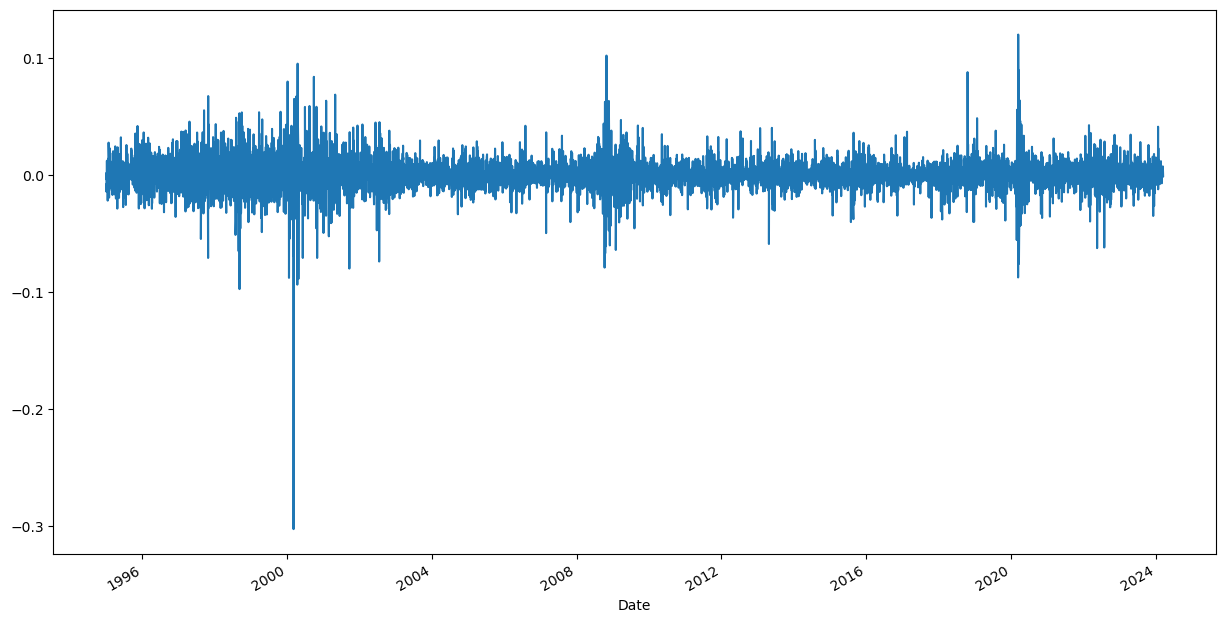

In [5]:
PG["simple ror"].plot(figsize=(15,8))

<Axes: ylabel='Frequency'>

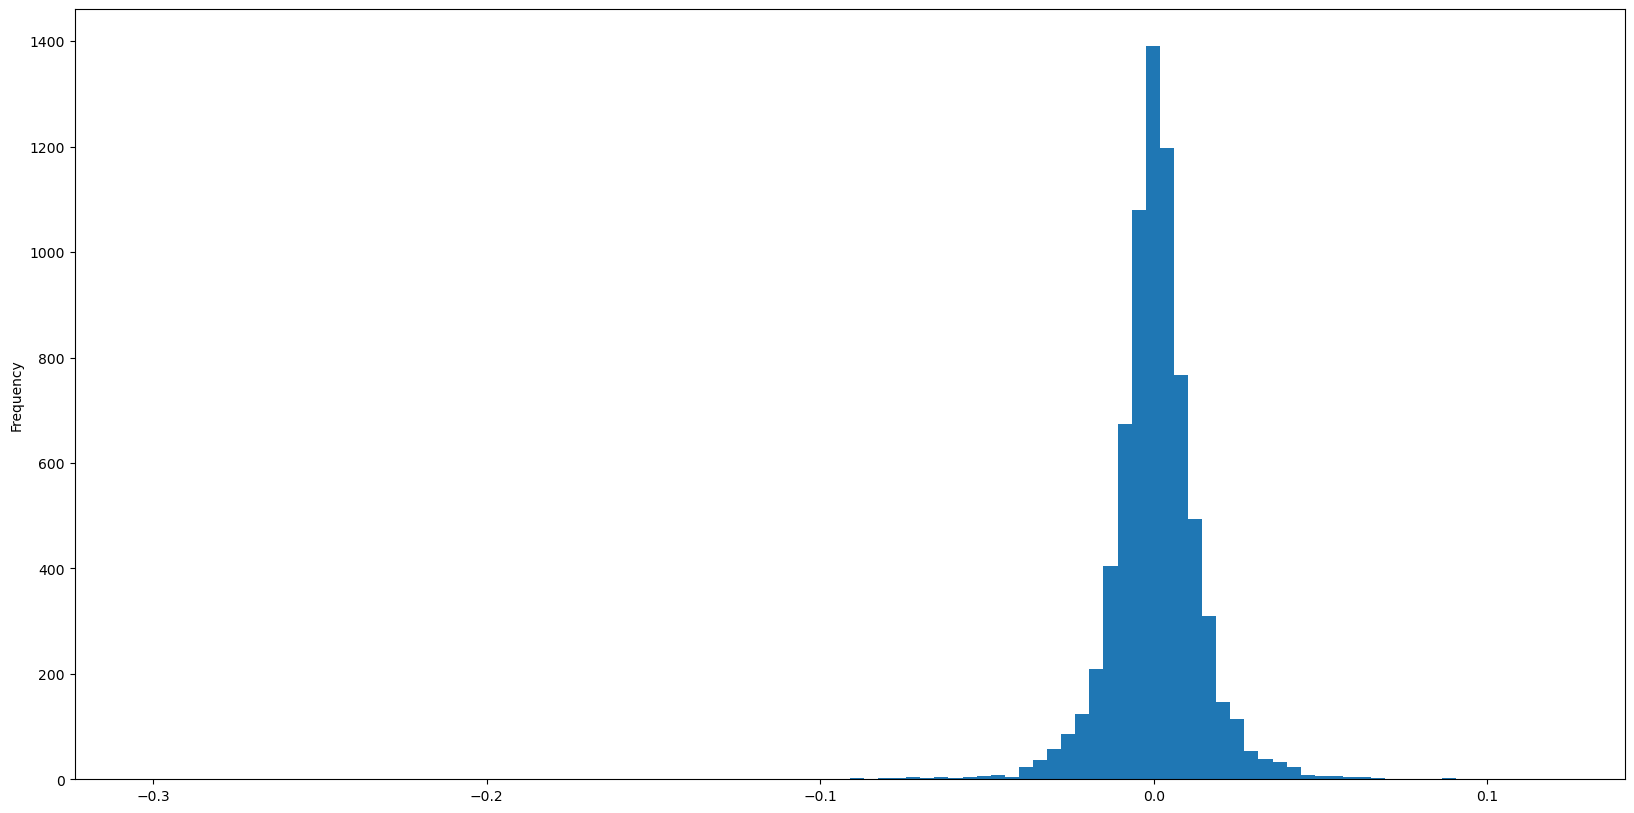

In [6]:
PG["simple ror"].plot(kind="hist", bins=100, figsize=(20,10))

### Descriptive statistics

In [7]:
print( PG["simple ror"].mean() )  # average
print( PG["simple ror"].median() ) # median
print( PG["simple ror"].std() )  # standard deviation
print( PG["simple ror"].describe() )

0.0005145309688799423
0.00043160695033683805
0.013857018739761053
count    7350.000000
mean        0.000515
std         0.013857
min        -0.302359
25%        -0.005659
50%         0.000432
75%         0.006942
max         0.120091
Name: simple ror, dtype: float64


## Yearly rate of return

In [8]:
# yearly simple ror using bad approximation
print( PG["simple ror"].mean()*250 )  # 250 trading days in a year
# yearly simple ror using exact formula
print( (PG["simple ror"].mean()+1)**250-1 ) 

0.12863274221998558
0.1372347533717202


In [9]:
print("Yearly simple rate of return for PG is", round(100*((PG["simple ror"].mean()+1)**250-1),2),"%" ) 

Yearly simple rate of return for PG is 13.72 %


## Log rate of return

In [10]:
PG['log ror']=np.log(PG["Adj Close"])-np.log(PG["Adj Close"].shift(1))
print(PG['log ror'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002048
1995-01-09   -0.004099
                ...   
2024-03-08   -0.001682
2024-03-11    0.007456
2024-03-12    0.002349
2024-03-13    0.002282
2024-03-14   -0.000647
Name: log ror, Length: 7351, dtype: float64


<Axes: xlabel='Date'>

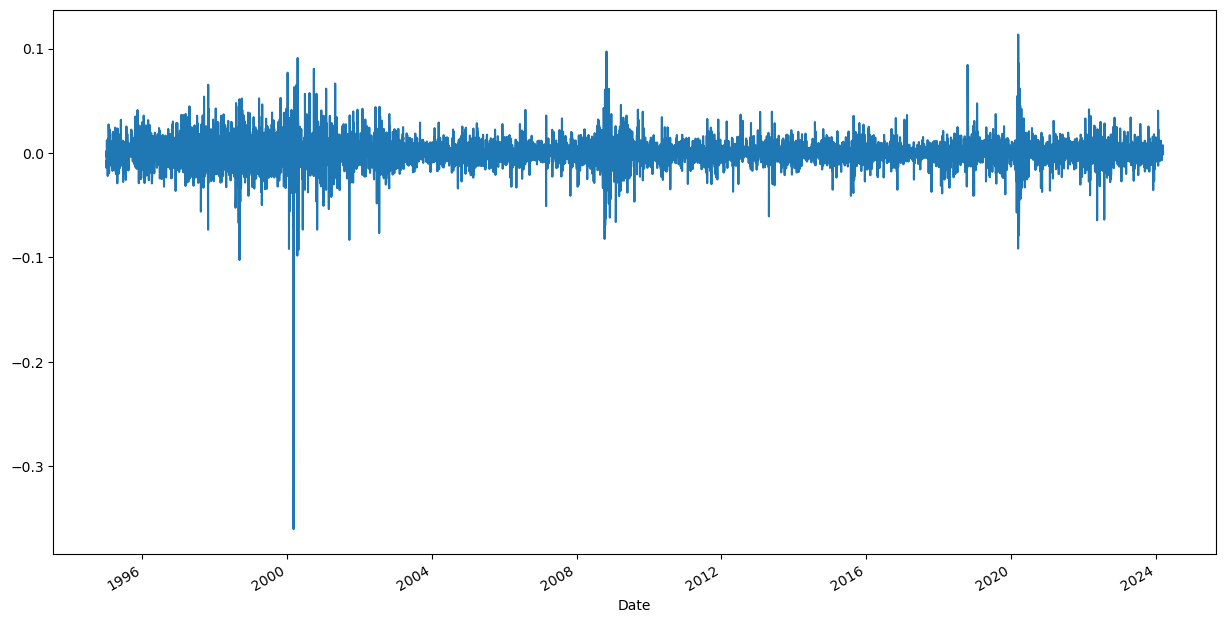

In [11]:
PG["log ror"].plot(figsize=(15,8))

<Axes: ylabel='Frequency'>

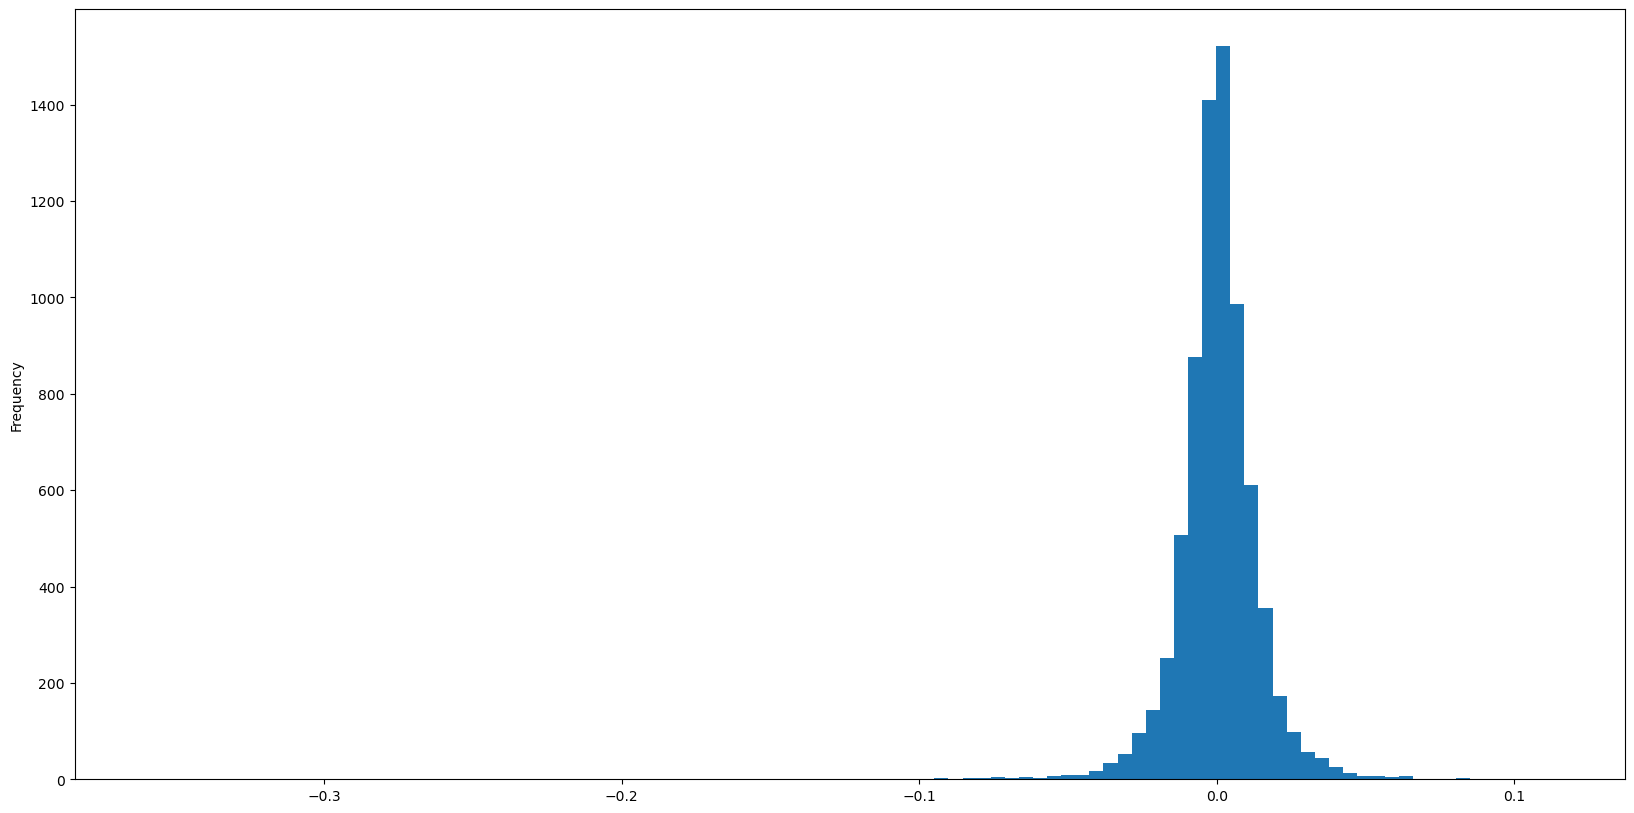

In [12]:
PG["log ror"].plot(kind="hist", bins=100, figsize=(20,10))

In [13]:
print( PG["log ror"].mean() )  # average
print( PG["log ror"].median() ) # median
print( PG["log ror"].std() )  # standard deviation

0.00041679960713586744
0.0004315138347892322
0.014045741573482061


In [14]:
print("Yearly log rate of return for PG is", round(100*(PG["log ror"].mean()*250),2),"%" )

Yearly log rate of return for PG is 10.42 %
